In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://huggingface.co/datasets/nprak26/remote-worker-productivity/raw/main/remote_work_productivity.csv"
df = pd.read_csv(url)

In [3]:
relevant_columns = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 
                    'Meetings_Per_Week', 'Job_Satisfaction', 'Education_Level', 'Department', 
                    'Job_Level', 'Has_Children', 'Location_Type', 'Company_Size', 'WFH_Days_Per_Week']
df = df[relevant_columns]

In [6]:
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [8]:
# numerical columns for outlier detection
num_cols = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 'Meetings_Per_Week', 'Job_Satisfaction']
df_num = df[num_cols]

In [9]:
# detect outliers using IQR method
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df_num < lower_bound) | (df_num > upper_bound)).sum()
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 Age                      2
Years_Experience        47
Work_Hours_Per_Week      2
Productivity_Score      13
Meetings_Per_Week        7
Job_Satisfaction       317
dtype: int64


In [10]:
# remove rows with outliers
df_clean = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
print(f"Original shape: {df.shape}, After outlier removal: {df_clean.shape}")

Original shape: (1500, 13), After outlier removal: (1131, 13)


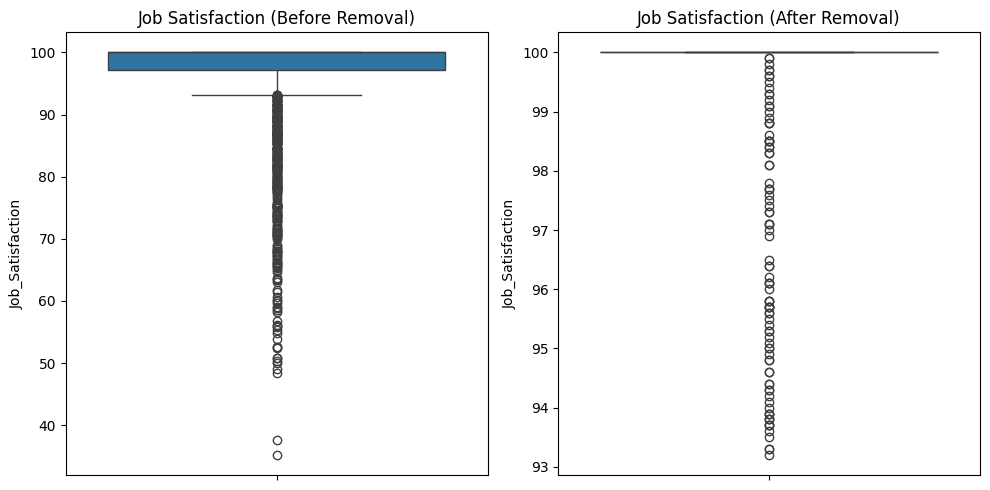

In [11]:
# Boxplot of Job_Satisfaction before and after
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Job_Satisfaction'])
plt.title("Job Satisfaction (Before Removal)")
plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['Job_Satisfaction'])
plt.title("Job Satisfaction (After Removal)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/job_satisfaction_before_after.png")
plt.show()

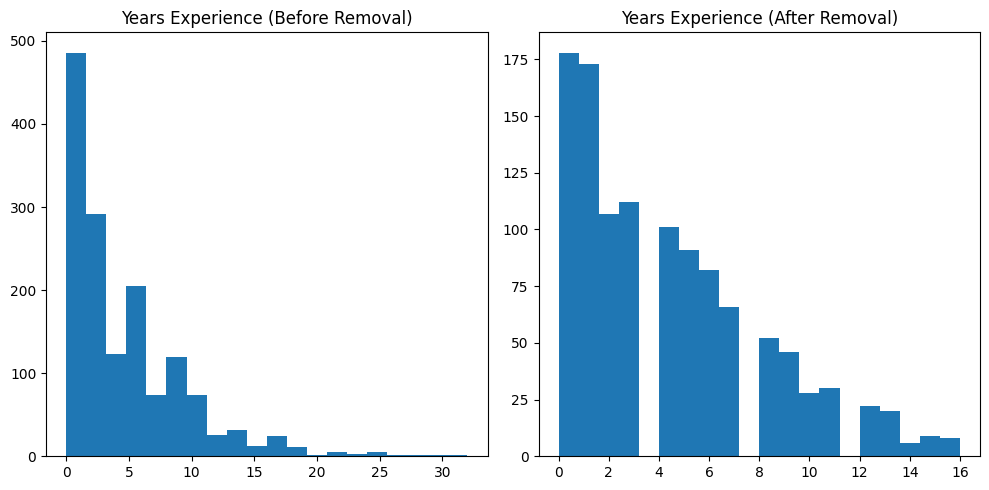

In [12]:
#  Histogram of Years_Experience before and after
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Years_Experience'], bins=20)
plt.title("Years Experience (Before Removal)")
plt.subplot(1, 2, 2)
plt.hist(df_clean['Years_Experience'], bins=20)
plt.title("Years Experience (After Removal)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/years_experience_before_after.png")
plt.show()